# 📚 Shot Map Tutorial - Matplotlib
19 Sep 2022

Shot Map merupakan sebuah visualisasi yang menampilkan letak atau posisi  dan hasil dari tembakan yang dilakukan dalam satu match.

Contoh data yang dapat dipakai sebagai patokan dapat dilihat melalui link berikut (dalam bentuk excel): https://docs.google.com/spreadsheets/d/1K8zenRnsv8_qYGscQuS0vSyqHiTYx_nrxd5-Er7kxLw/edit?usp=sharing

Data yang terdapat di dalam file tersebut mencangkup: Nama Tim di kolom `Team`, nilai xG di kolom `xG`, nama pemain di `Player`, posisi tembakan pada kolom `x` dan `y`, serta menit terjadinya tembakan di kolom `Minutes`

Sekali visualisasi ini berhasil dibuat, maka kita hanya mengganti beberapa variable seperti 1) `home_team`, 2) `away_team`, 3) `home_color`, 4) `away_color`.

List tools

1) Untuk mengetahui posisi `x`,`y` dan `Event`:
https://fcpythonvideocoder.netlify.app/

2) Untuk mengetahui nilai `xG` berdasarkan posisi `x` dan `y`:
https://torvaney.github.io/projects/xG.html






## Apa saja yang kita butuhkan?
Visualisasi ini membutuhkan beberapa library penting, maka yang perlu library disiapkan atau diinstall dalam tutorial ini adalah:
`matplotlib`, `pandas`, `numpy`, `highlight_text`, dan `mplsoccer`

*Cara menginstall library dapat dilakukan dengan cara:*

```
pip install <nama_library>
```



In [ ]:
pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as path_effects
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from mplsoccer import VerticalPitch, Pitch
from mplsoccer.cm import create_transparent_cmap
from mplsoccer.utils import FontManager

## Persiapkan data yang sudah diambil
###Catatan
Satuan menit menggunakan data type `float`, sehingga dalam format `desimal`. Sebagai contoh, apabila suatu tendangan terjadi pada `menit` ke 5 detik 30, maka nilai yang diinput adalah `5.5`

Kemudian saves dengan format `csv` dan `upload` kembali ke Google Drive. Jangan lupa untuk `share link to anyone` agar data dapat dibaca kapan saja.

Apabila anda ingin data diolah secara lokal saja di pc, cukup masukan data di dalam folder yg sama dengan file pythonnya.

`df = pd.read_csv('namafile_csv')`

In [ ]:
# Load dataframe dari google Drive
file = '1byA5HdomR6GFU0oQQcNsK6B_8DC5yGNv'
url = f'https://drive.google.com/uc?id={file}'
df = pd.read_csv(url)
df.head()

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
0,Persikabo 1973,0.00,NaN,Game Start,NaN,NaN,0.0,NaN,Blocked
1,Persebaya,0.00,NaN,Game Start,NaN,NaN,0.0,NaN,Miss
2,Persikabo 1973,0.01,Dimas,Miss,81.0,68.0,2.5,NaN,Saved
3,Persebaya,0.01,Sho,Miss,15.0,69.0,14.4,NaN,Goal
4,Persikabo 1973,0.02,Infantri,Miss,70.0,51.0,17.0,NaN,NaN


## Set Font Yang Akan Digunakan

In [ ]:
# Load Font
font_1 = FontManager(('https://github.com/dharmatype/Bebas-Neue/blob/master/fonts/BebasNeue(2014)ByFontFabric/'
                        'BebasNeue-Bold.ttf?raw=true'))
font_2 = FontManager(('https://github.com/EverRest/EvSe/blob/master/fonts/AlternateGothic2/'
                        'alternate-gothic-no2-bt.ttf?raw=true'))

## Seleksi `Event` berdasarkan Tim `home` dan `away` dalam match Tersebut
Kali ini kita akan membagi `Event` tembakan yang terjadi berdasarkan pada masing-masing tim, dimana kita akan menggunakan variabel `home_team` dan `away_team`.

In [ ]:
#Set Variable
home_team = "Persikabo 1973"
away_team = "Persebaya"

In [ ]:
#DataFrame Home Team
df_home = df[(df["Team"] == home_team)]
df_home.head()

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
0,Persikabo 1973,0.00,NaN,Game Start,NaN,NaN,0.0,NaN,Blocked
2,Persikabo 1973,0.01,Dimas,Miss,81.0,68.0,2.5,NaN,Saved
4,Persikabo 1973,0.02,Infantri,Miss,70.0,51.0,17.0,NaN,NaN
5,Persikabo 1973,0.45,Gustavo,Miss,97.0,59.0,19.0,NaN,NaN
13,Persikabo 1973,0.03,Gustavo,Goal,89.0,49.0,52.1,NaN,NaN


In [ ]:
xG_home_all_event = np.round(np.sum(df_home['xG']),2)
xG_home_blocked = np.round(np.sum(df_home[df_home['Event'] == 'Blocked']['xG']),2)
xG_home_miss = np.round(np.sum(df_home[df_home['Event'] == 'Miss']['xG']),2)
xG_home_saved = np.round(np.sum(df_home[df_home['Event'] == 'Saved']['xG']),2)
xG_home_goal = np.round(np.sum(df_home[df_home['Event'] == 'Goal']['xG']),2)

In [ ]:
xG_home_all_event, xG_home_blocked, xG_home_miss, xG_home_saved, xG_home_goal

(0.76, 0.0, 0.7, 0.03, 0.03)

In [ ]:
#DataFrame Away Team
df_away = df[(df["Team"] == away_team)]
df_away.head()

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
1,Persebaya,0.00,NaN,Game Start,NaN,NaN,0.0,NaN,Miss
3,Persebaya,0.01,Sho,Miss,15.0,69.0,14.4,NaN,Goal
6,Persebaya,0.02,Junior,Miss,28.0,48.0,20.3,NaN,NaN
7,Persebaya,0.28,Junior,Saved,7.0,57.0,24.5,NaN,NaN
8,Persebaya,0.12,Sho,Blocked,7.0,29.0,27.0,NaN,NaN


In [ ]:
xG_away_all_event = np.round(np.sum(df_away['xG']),2)
xG_away_blocked = np.round(np.sum(df_away[df_away['Event'] == 'Blocked']['xG']),2)
xG_away_miss = np.round(np.sum(df_away[df_away['Event'] == 'Miss']['xG']),2)
xG_away_saved = np.round(np.sum(df_away[df_away['Event'] == 'Saved']['xG']),2)
xG_away_goal = np.round(np.sum(df_away[df_away['Event'] == 'Goal']['xG']),2)

In [ ]:
xG_away_all_event, xG_away_blocked, xG_away_miss, xG_away_saved, xG_away_goal

(1.24, 0.12, 0.22, 0.9, 0.0)

## Seleksi hasil outcome tendangan berdasarkan `Event`.
Dalam `Event` dalam `dataframe` terdapat beberapa outcome yang telah kita catat, yaitu: `goal`, `saved`, `blocked`, dan `miss`. Sehingga diperlukan seleksi untuk membagi berdasarkan hasil dari tembakan yang dilakukan oleh pemain.



In [ ]:
# Memisahkan Jenis Shots berdasarkan Tim
# Seleksi Tendangan yang menghasilkan Goal
df_home_goal = df_home[(df_home["Event"] == "Goal")]
df_away_goal = df_away[(df_away["Event"] == "Goal")]

In [ ]:
df_home_goal

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
13,Persikabo 1973,0.03,Gustavo,Goal,89.0,49.0,52.1,NaN,NaN


In [ ]:
df_away_goal

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8


In [ ]:
# Seleksi Tendangan yang diselamatkan oleh Kiper
df_home_saved = df_home[(df_home["Event"] == "Saved")]
df_away_saved = df_away[(df_away["Event"] == "Saved")]

In [ ]:
df_home_saved

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
977,Persikabo 1973,0.03,Yandi,Saved,78.0,13.0,89.5,NaN,NaN


In [ ]:
df_away_saved

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
7,Persebaya,0.28,Junior,Saved,7.0,57.0,24.5,NaN,NaN
9,Persebaya,0.16,Junior,Saved,9.0,58.0,24.5,NaN,NaN
11,Persebaya,0.19,Junior,Saved,9.0,64.0,40.4,NaN,NaN
12,Persebaya,0.14,Junior,Saved,8.0,58.0,47.5,NaN,NaN
15,Persebaya,0.13,Brylian,Saved,8.0,58.0,68.0,NaN,NaN


In [ ]:
# Seleksi Tendagan yang diBlocked
df_home_block = df_home[(df_home["Event"] == "Blocked")]
df_away_block = df_away[(df_away["Event"] == "Blocked")]

In [ ]:
df_home_block

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8


In [ ]:
df_away_block

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
8,Persebaya,0.12,Sho,Blocked,7.0,29.0,27.0,NaN,NaN


In [ ]:
# Seleksi Tendangan yang Melenceng
df_home_miss = df_home[(df_home["Event"] == "Miss")]
df_away_miss = df_away[(df_away["Event"] == "Miss")]

In [ ]:
df_home_miss

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
2,Persikabo 1973,0.01,Dimas,Miss,81.0,68.0,2.5,NaN,Saved
4,Persikabo 1973,0.02,Infantri,Miss,70.0,51.0,17.0,NaN,NaN
5,Persikabo 1973,0.45,Gustavo,Miss,97.0,59.0,19.0,NaN,NaN
16,Persikabo 1973,0.11,Gustavo,Miss,89.0,49.0,72.2,NaN,NaN
34,Persikabo 1973,0.11,Oktavianto,Miss,78.0,13.0,75.4,NaN,NaN


In [ ]:
df_away_miss

,Team,xG,Player,Event,x,y,Minutes,Unnamed: 7,Unnamed: 8
3,Persebaya,0.01,Sho,Miss,15.0,69.0,14.4,NaN,Goal
6,Persebaya,0.02,Junior,Miss,28.0,48.0,20.3,NaN,NaN
10,Persebaya,0.10,Dandi,Miss,12.0,58.0,34.1,NaN,NaN
14,Persebaya,0.05,Brylian,Miss,8.0,58.0,68.0,NaN,NaN
35,Persebaya,0.04,Junior,Miss,27.0,35.0,77.0,NaN,NaN


## Persiapan Visualisasi
Persiapan yang saya lakukan di bawah ini antara lain:
1.   Set warna yang dipakai untuk membedakan warna `home_team` dengan `away_team` dg variabel `home_color` dan `away_color`
2.   List posisi goal berdasarkan `x` dan `y` tembakan dilakukan
3.   Menampilkan nama pencetak `goal` ke dalam Visualisasi
4.   Menghitung masing-masing tipe tembakan yang dilakukan



In [ ]:
home_color = '#000000'
away_color = '#036933'

#Set Warna Color Map
cmap_home = create_transparent_cmap(color= home_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)
cmap_away = create_transparent_cmap(color= away_color,n_segments=100,alpha_start=0.2,alpha_end=0.8)

#List Posisi Goal
x = df_home_goal[df_home_goal['Event']=='Goal']['x'].tolist()
x1 = df_away_goal[df_away_goal['Event']=='Goal']['x'].tolist()
y = df_home_goal[df_home_goal['Event']=='Goal']['y'].tolist()
y1 = df_away_goal[df_away_goal['Event']=='Goal']['y'].tolist()

# Annotation text nama pencetak gol
text_home = df_home_goal[df_home_goal['Event']=='Goal']['Player'].tolist()
text_away = df_away_goal[df_away_goal['Event']=='Goal']['Player'].tolist()

# Func Count untuk masing-masih tipe shoot
# Home
cnt_goal_home = len(df_home_goal)
cnt_saved_home = len(df_home_saved)
cnt_blocked_home = len(df_home_block)
cnt_missed_home = len(df_home_miss)
# Away
cnt_goal_away = len(df_away_goal)
cnt_saved_away = len(df_away_saved)
cnt_blocked_away = len(df_away_block)
cnt_missed_away = len(df_away_miss)

## Visualisasi
Dengan menggunakan library `mplsoccer`, maka kita dapat membuat plot lapangan secara otomatis. Standar nilai `x` dan `y` yang saya pakai ialah menggunakan `type` dari `wyscout`.

Dalam pembuatan visualisasi khususnya mengenai pembuatan lapangan dan standar lapangan yang dipakai dapat dilihat melalui link berikut ini:
https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_setup/plot_pitches.html



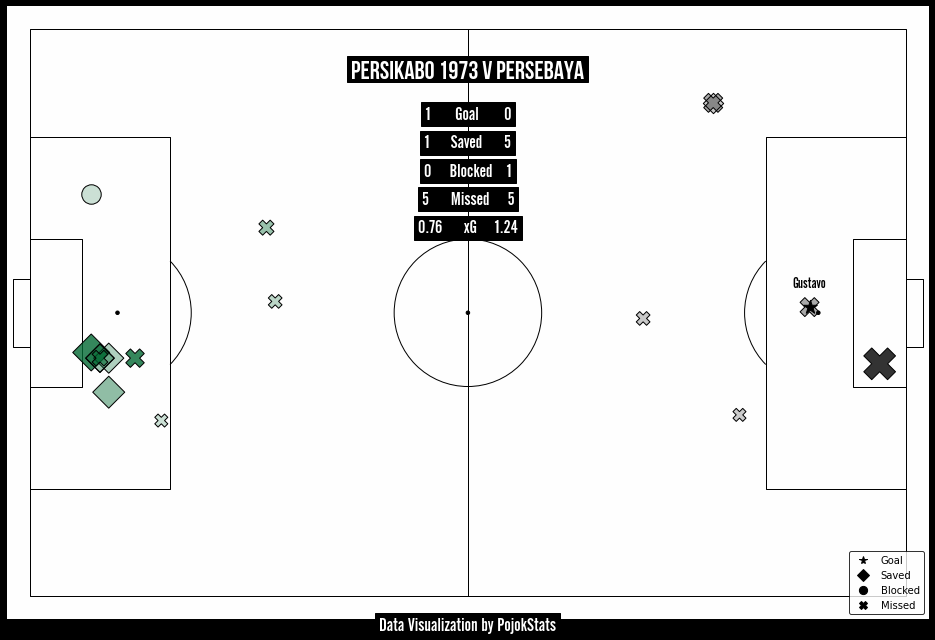

In [ ]:
pitch = Pitch(pitch_type = 'wyscout', pitch_color='#fefefe', line_color='#000000', linewidth=1, goal_type = 'box')
fig,ax = pitch.draw(figsize = (16,9))
fig.set_facecolor('#000000')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Saved Shot berdasarkan nilai xG
sc1 = plt.scatter(df_home_saved['x'],df_home_saved['y'],
            s = ((df_home_saved['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_saved['xG'],
            edgecolor = 'black',
            marker = 'D')
sc2 = plt.scatter(df_away_saved['x'],df_away_saved['y'],
            s = ((df_away_saved['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_saved['xG'],
            edgecolor = 'black',
            marker = 'D')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Blocked Shot berdasarkan nilai xG
sc3 = plt.scatter(df_home_block['x'],df_home_block['y'],
            s = ((df_home_block['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_block['xG'],
            edgecolor = 'black',
            marker = 'o')
sc4 = plt.scatter(df_away_block['x'],df_away_block['y'],
            s = ((df_away_block['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_block['xG'],
            edgecolor = 'black',
            marker = 'o')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Miss Shot berdasarkan nilai xG
sc5 = plt.scatter(df_home_miss['x'],df_home_miss['y'],
            s = ((df_home_miss['xG'] * 1900) + 150),
            cmap = cmap_home,
            c = df_home_miss['xG'],
            edgecolor = 'black',
            marker = 'X')

sc6 = plt.scatter(df_away_miss['x'],df_away_miss['y'],
            s = ((df_away_miss['xG'] * 1900) + 150),
            cmap = cmap_away,
            c = df_away_miss['xG'],
            edgecolor = 'black',
            marker = 'X')

#Menampilkan posisi dan ukuran tendangan yang menghasilkan Goal berdasarkan nilai xG
sc7 = plt.scatter(df_home_goal['x'],df_home_goal['y'],
            s = (df_home_goal['xG'] * 1900) + 150,
            c = home_color,
            edgecolor = 'black',
            marker = '*')

sc8 = plt.scatter(df_away_goal['x'],df_away_goal['y'],
            s = ((df_away_goal['xG'] * 1900) + 150),
            c = away_color,
            edgecolor = 'black',
            marker = '*')

#Text Tambahan
ax.text(x=50, y=7, s='Persikabo 1973 v Persebaya',
        size=25, fontproperties=font_1.prop, color='white', backgroundcolor = '#000000' , va='center', ha='center')

ax.text(x=50, y=15, s='{}       Goal       {}'.format(cnt_goal_home,cnt_goal_away), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=20, s='{}      Saved      {}'.format(cnt_saved_home,cnt_saved_away), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=25, s='{}     Blocked    {}'.format(cnt_blocked_home,cnt_blocked_away), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=30, s='{}      Missed     {}'.format(cnt_missed_home,cnt_missed_away), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=35, s='{}      xG     {}'.format(xG_home_all_event,xG_away_all_event), size=18,
              fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

ax.text(x=50, y=105, s='Data Visualization by PojokStats',
        size=18, fontproperties=font_2.prop, color='white', backgroundcolor = '#000000' ,
              va='center', ha='center')

# Legends
goal = Line2D([0], [0], marker='*', markersize=np.sqrt(30), color='black', linestyle='None')
saved = Line2D([0], [0], marker='D', markersize=np.sqrt(30), color='black', linestyle='None')

blocked = Line2D([0], [0], marker='o', markersize=np.sqrt(30), color='black', linestyle='None')
missed = Line2D([0], [0], marker='X', markersize=np.sqrt(30), color='black', linestyle='None')

plt.legend([goal, saved, blocked, missed], ['Goal', 'Saved', 'Blocked', "Missed"], loc="lower right",
           markerscale=1.5, scatterpoints=1, fontsize=10, facecolor = '#fefefe', edgecolor = '#000000')

# Text annotation untuk pencetak Gol
for i in range(len(x1)):
    plt.annotate(text_away[i], (x1[i], y1[i] + 5.5),c='black',size=14, fontproperties=font_2.prop, ha='center')
for i in range(len(x)):
    plt.annotate(text_home[i], (x[i], y[i] - 3.5),c='black',size=14, fontproperties=font_2.prop, ha='center')

#Save Image
plt.savefig("SM_PersebayavPSIM.png", bbox_inches = "tight", dpi = 400)

#Referensi
https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_scatter.html